### Analyzing the NYC Subway Dataset
##### Overview
This project consists of two parts. In Part 1 of the project, you should have completed the questions in Problem Sets 2, 3, and 4 in the Introduction to Data Science course.
This document addresses part 2 of the project. Please use this document as a template and answer the following questions to explain your reasoning and conclusion behind your work in the problem sets. You will attach a document with your answers to these questions as part of your final project submission.
Section 0. References

Please include a list of references you have used for this project. Please be specific - for example, instead of including a general website such as stackoverflow.com, try to include a specific topic from Stackoverflow that you have found useful.

Note to Reviewer: I've already done the Intro to Data Science previous to joining the nanodegree progam. At the time I did it, the download link in the material section was broken (link is still broken), hence I did all the exercises in Udacity platform.

For the purposes of this assesssment, I've went through all problem sets again and worked on a few, but not all assignments. I have reproduced linear regression and visualization code here, some as code blocks and some as code boxes.

### Section 1. Statistical Test

##### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

A Mann-Whitney U-statistic, with a two-tailed p-value. The null hypothesis is that the distribution of both groups, entries per hour when it is raining and entries per hour when it is not raining, are identical, so that there is a 50% chance that an observation randomly selected from one groups is greater than an observation randomly selected from the other group. The alternative hypothesis is that the probabilty of a randomly selected observation of one group being greater than one of the other group is different than 50%, either lower or higher. So,

H_zero: P(x>y) equal 0.50  
H_alt:  P(x>y) not equal 0.50

P-critical is 0.05, and is two-tailed P value.

sources:   
http://www.graphpad.com/guides/prism/6/statistics/index.htm?how_the_mann-whitney_test_works.htm  
https://storage.googleapis.com/supplemental_media/udacityu/ud359-nd/Mann-Whitney%20U%20Test.pdf

##### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

The Mann-Whitney was used because the data was not normally distributed, which as requirement for Student's t or Welch's t test (the datasets are positively skewed). The test is executed by calculating the rank by assigning numeric ranks to the observations, and comparing the total rank for each distribution. 

##### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

Mean with rain: 1105.4463767458733  
Mean without rain: 1090.278780151855  
U-statistic: 1924409167.0  
p-value: 0.049999825586979442

The means with rain and without rain are 1105 and 1090, respectively. The resulting p-value is 0.049999825586979442.

##### 1.4 What is the significance and interpretation of these results?

p < p-critical, hence we can reject the null hypothesis, and conclude there is statisticaly significant evidence that the entries per hour in the subway with rain and without rain do not have have identical distributions.


### Section 2. Linear Regression
##### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Statsmodels or Scikit Learn
Gradient descent using Scikit Learn
Or something different?

Originally I've used gradient descent, but I've coded the algorithm instead of using from scikit learn. Here is my implementation of gradient descent (based on what I've learned from Andrew Ng course in machine learning):

````
def gradient_descent(theta, X, y, alpha, num_iters=50):
    costs = [] #costs are computed at every step for further analysis, to be removed at production
    m,n = X.shape
    for i in range(num_iters):
        errors = np.dot(X, theta) - y
        costs.append(int(np.sum(errors**2)/(2*m)))
        gradient = np.sum(X[:,1:] * errors[:,np.newaxis], axis=0)/m
        gradientZero = np.sum(errors)/m
        theta[1:] = theta[1:] - (alpha * gradient)
        theta[:1] = theta[:1] - (alpha * gradientZero)

    return theta, costs
`````
    
On the second exercise, I've used LinearRegression function from scikit, as instructed.


##### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

First, I've correlated each variable with one another. Next, I grouped all variables with correlation greater than 0.8 (based on pearson correlation coefficient) and selected only one of them from each group.

I understand that selecting one variable out of a group of correlated variables is less effective than doing a dimensionality reduction technique such as Principal Component Analysis, which would keep the correlation of each variable, but I've decided to stick with this feature selection strategy for the moment for learning purposes.

    from scipy.stats.stats import pearsonr   
    def correlate_one_another(dataframe, variables, sameness=0.8):
        pairs = set([])
        for var1 in variables:
            for var2 in variables:
                if abs(pearsonr(dataframe[var1], dataframe[var2])[0])>sameness and var1 != var2:
                    pairs.add((var1,var2))
        return pairs

To decide which variables were the best option, I've also correlated all of them with the values column (Entries_hour).

    def correlate_with_y(dataframem variables)
        correlations = {}
        for variable in variables:
            correlations[variable] = pearsonr(dataframe[variable],values)[0]
        return correlations

Based on this, I've selected one variable from each group and only ones with correlation with values greater than 0.01. These were the variables selected: ['minpressurei','meanwindspdi','mintempi','Hour', 'fog', 'UNIT'] 
(I have not tested UNIT since it was clear from the beggining it was the biggest correlation)

Finally, to ensure I had the optimal combination of variables, I've runned linear regression for all combinations and compared the results. As a measure of performance, I've set gradient descent to return the cost difference between the first and last iteration, divided by the cost of the first iteration (theta was initialized to all zeros). That gave me a percentage of how much of the original cost I was able to reduce. The best option was to use all the variables selected above. 

    import itertools
    def combinations(x):
        return [c for i in range(len(x)+1) for c in itertools.combinations(x,i)]

    def test_combinations(dataframe, value_column, variables):
        values = dataframe[value_column]
        var_groups = combinations(variables)
        combs = {}
        for group in var_groups:
            if group: combs[group] = linear_regression(dataframe[list(group)], values)
        return combs

I've used dummy units for UNIT, as the original code. For Hour variable I've experimented with polynomials, since it is clearly not linear. 

    def add_polynomials(dataframe, variables, num_pol):
        for variable in variables:
            for i in range(1,num_pol+1):
                dataframe.loc[:,variable + str(i)] = dataframe[variable] ** i
        return dataframe

I had good results with polynomials for the Hour variable, using up to 30 degrees of polynomials initially. But I've considered it behaved more like a discrete than a continuous variable, and later switched to dummy units, similar to UNIT, and got similar results but with faster performance.

###### 2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model. Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.” Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  

I have selected all variables based on exploration and experimentation. The complete answer is on the previous question.

##### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

{intercept: 1095.3833418102863, 'meanwindspdi': 39.767116282426102, 'minpressurei': -38.200835819591248, 'mintempi': -63.309617224150685, 'fog': 27.1674426834863} (results using scipy linear regression method)

##### 2.5 What is your model’s R2 (coefficients of determination) value?

0.502542024408

##### 2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?

It means the model can explain for 50.25% of the variance of the values. It is a very high R2, and I think it is appropriate for the dataset.

The main driver here is UNIT, which is expected. Without this variable, even using a lot of computation and tricks, I could get an R2 close to 0.10, very low to be used to predict ridership. 

### Section 3. Visualization
##### Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

##### 3.1 One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days. 
You can combine the two histograms in a single plot or you can use two separate plots. If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case. For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval. Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.


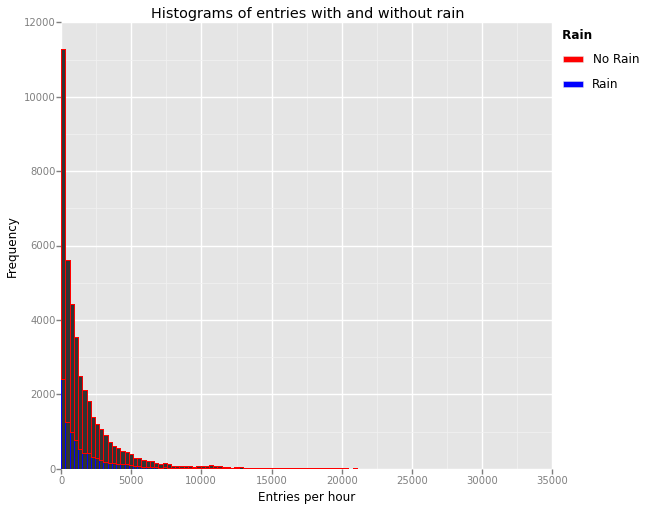

<ggplot: (1117772721)>

In [101]:
%matplotlib inline
from pandas import *
from ggplot import *
df = read_csv('turnstile_weather_v2.csv')
df.loc[:,'rain'] = df['rain'].map(lambda x: 'No Rain' if x == 0 else 'Rain')
color_map = {'column_name': 'rain','dict':{'red': 'no rain','blue': 'rain'},'scale_type': 'discrete'}
ggplot(df, aes(x='ENTRIESn_hourly', color='rain')) + \
    geom_histogram(binwidth=300) + \
    scale_colour_manual(values=['red', 'blue']) + \
    ggtitle('Histograms of entries with and without rain') + \
    labs('Entries per hour', 'Frequency')

    

The plot above shows little difference between the distribution of entries per hour in the Rain and No Rain scenarios. Based on the overlaid histograms, we can suppose the raining variable has a weak impact on the entries per hour value (although the Mann-Whithney test conducted in the previous sections shows there is a statistically significant difference of entries per hour when the rain variable changes).

question to the reviewer: 
As much as I tried, I couldn't plot a density histogram with python ggplot. In R would be geom_histogram(aes(y=..density..)), but I can't find the equivalent syntax for this library (I've read through forums, the docs and the library code even). How would you do this?

another issue, how do you set a label for the binary values? I've applied a map function to the dataframe, but I'm guessing there is an way of doing this directly in the graph instead of having to modify the dataframe. I've also looked for this answer and was able to find it in r, but not in python (the ggplot library for python has really bad docs, despite the fact the community did an amazing job in the overall library)

##### 3.2 One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:
Ridership by time-of-day
Ridership by day-of-week

I will look into the three variables that impact entries per hour significantly, according to my analysis during feature selection: Unit, Hour and Mintenpi. 

For Unit, I've attempted to use a barplot visualization, but there are a lot of units (240) which makes the graph hard to interpret. I've sorted the units per average of hourly entries, descending. You can see from the graph that more than 2/3 of the units have less than 2000 average hourly entries, while the remaining scale up to 10.000 average hourly entries. The graph indicates there is probably a strong correlation between UNIT and entries per hour.

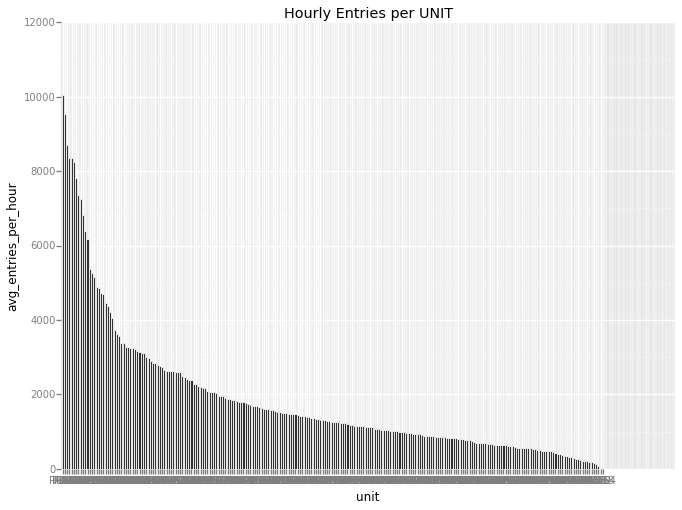

<ggplot: (1081392333)>

In [102]:
#summarize averages per Unit
units= df['UNIT'].unique()
avg_entries = []
for unit in units:
    avg_entries.append(df[df['UNIT'] == unit]['ENTRIESn_hourly'].mean())
df_graph = DataFrame({'unit': Series(units), 'avg_entries_per_hour': Series(avg_entries) })
df_graph = df_graph.sort(columns=['avg_entries_per_hour'], ascending=[0] )

#plot
ggplot(df_graph, aes(x='unit', y='avg_entries_per_hour')) + \
    geom_bar(stat="identity") + \
    ggtitle('Hourly Entries per UNIT')

For Hour, it easier to visualize, since there are only six categories. Below is the graph for Hour:

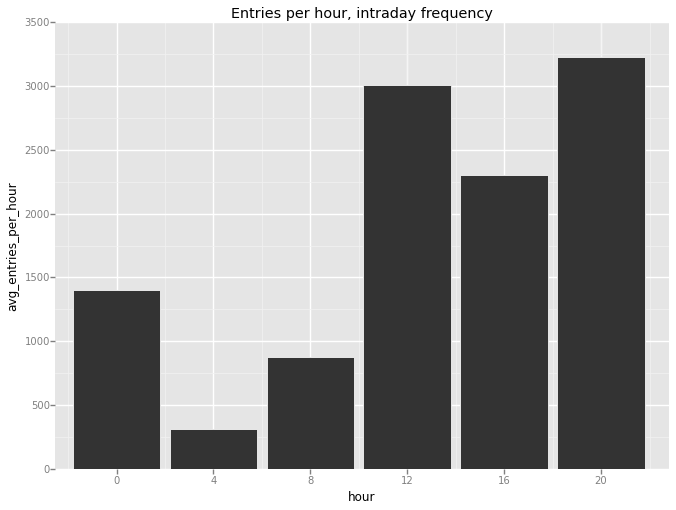

<ggplot: (1080211429)>

In [103]:
df.loc[:,'hour'] = df['hour'].map(lambda x: str(x)) #show as discrete variables, not continuous
#summarize averages per hour
hours= ['0','4','8','12','16','20']
avg_entries = []
for hour in hours:
    avg_entries.append(df[df['hour'] == hour]['ENTRIESn_hourly'].mean())
df_graph = DataFrame({'hour': Series(hours), 'avg_entries_per_hour': Series(avg_entries) })
    
#plot
ggplot(df_graph, aes(x='hour', y='avg_entries_per_hour')) + \
    geom_bar(stat="identity") + \
    ggtitle('Entries per hour, intraday frequency')

The graph shows that entries per hour are higher after midday, specially during 12AM-4PM and 8PM-12PM intervals. Clearly there is a correlation between the time of the day and entries per hour, but the relationship is not exactly linear, meaning we have to either consider it as a discrete variable or use polynomials to represent hour in the regression analysis.

Furthermore, let's look at temperature:

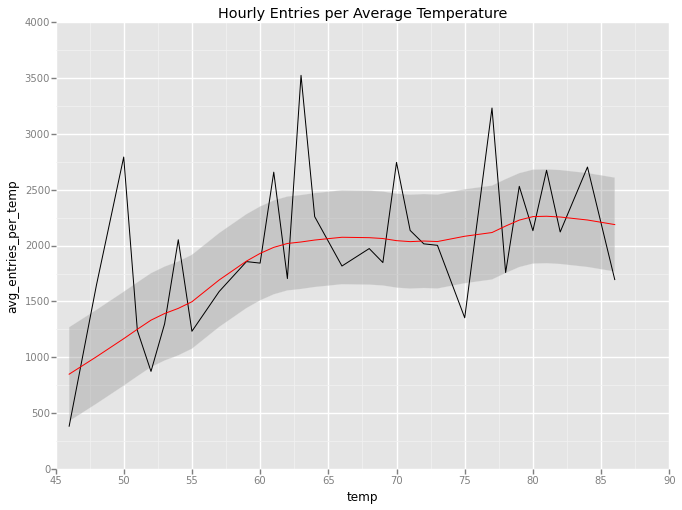

<ggplot: (1073452541)>

In [104]:
df.loc[:,'tempi'] = df['tempi'].map(lambda x:int(x)) #show as discrete variables, not continuous
temps= df['tempi'].unique()
avg_entries = []
for temp in temps:
    avg_entries.append(df[df['tempi'] == temp]['ENTRIESn_hourly'].mean())
df_graph = DataFrame({'temp': Series(temps), 'avg_entries_per_temp': Series(avg_entries) })

ggplot(df_graph, aes(x='temp', y='avg_entries_per_temp')) + \
    geom_line(stat="identity") + stat_smooth(span=0.40, colour='red') + \
    ggtitle('Hourly Entries per Average Temperature')


From the graph you can visualize that, although there is a lot of noise, there is a slightly upwards trend of hourly entries as the temperature increases. You can see a correlation, although a very weak one, and given the noise, adding the temperature feature to the regression can either improve or overfit the model. So care must be taken; an overfit would leak to worst predictions when applied to real data.

### Section 4. Conclusion

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.
##### 4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  
##### 4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

Based on the Mann-Whitney test, we can conclude there is evidence that more people ride the NYC subway when it is raining than when it is not raining. The p-value is very close to 0.05, but it still enough to pass  the test with 95% confidence level.

However, the pearson correlation test conducted during feature selection showed only a 0.003 correlation between rain and entries per hour. The rain variable had a poor correlation score compared to other variables present in the dataset, and hence should not be prioritized during feature selection for linear regression. There are two other features with greater impact on the linear regression model: time of the day and Unit. These are the main predictors of entries per hour.

The low correlation of temperature and hourly entries is also clear in the visualization depicted above, that shows a lot of noise amongst a weak trend.

##### Section 5. Reflection

Please address the following questions in detail. Your answers should be 1-2 paragraphs long.
##### 5.1 Please discuss potential shortcomings of the methods of your analysis, including Dataset, Analysis, such as the linear regression model or statistical test.

Most of the shortcoming were discussed during the question itself. Linear regression is not ideal. For better results, instead of selectiong only a handful of features to enhance performance I could apply a dimensionality reduction technique such as principal component analysis. To account for overfit, I could also add regularization to linear regression. 

On the gradient descent I've coded, I did not account for the possiblity of achieving local minima. To overcome that, I would have to randomly initialize theta (parameters) and run gradient descent n times, picking the best value.

On the visuaizations, there is a lot to be done, including increasing its visual appeal using colors, labels and thicker lines, and use different types of graphs. I would also try other visualization libraries, such as bokeh, which is also a grammar of graphics implementation but not mirrored on R's ggplot, or matplotlib.

##### From reviewer: Please expand the discussion to discuss also shortcomings about the data set.

Some of the data used are aggregated, not raw, as in hour to represent time of the day. Each hour in the model actually represents a 4-hours bin instead of a specific time. If hour was reported as a continuous variable of time instead of discrete variable, it would have a stronger correlation with entries per hour and therefore generate a stronger model. 

Other data that was not used in the linear regression analysis is day of the week, day of the month, month of the year, and year. This longitudinal data, specially day of the week, may be correlated with entries per hour and be used to further improve the model.

Finally, positional data such as latitude and longitude, or neighborhoods, could be a replacement for the dummy features based on UNIT. A linear regression model with less features would have a better performance.

##### 5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?
I should note I have used different datasets for linear regression and visualization (the dataset used in linear regression had fewer variables).
